### Monte Carlo 

2 reports by the desk by the end of day
guess: 2 report will take anywhere between A (1-5hr) & B (2-6hr)/ one report has no bearing on another (assumption). Check the likehood with uniform distribtution

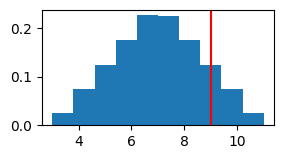

0.125145


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt



sims = 1000000
A = np.random.uniform(1,5,sims)
B = np.random.uniform(2,6,sims)
duration = A + B

plt.figure(figsize = (3,1.5))
plt.hist(duration,  density = True)
plt.axvline(9, color ='r')
plt.show()
print((duration>9).sum()/sims)

In [7]:
#import data

def get_data(stocks,start,end):
    stockData = 


ModuleNotFoundError: No module named 'pandas_datareader'

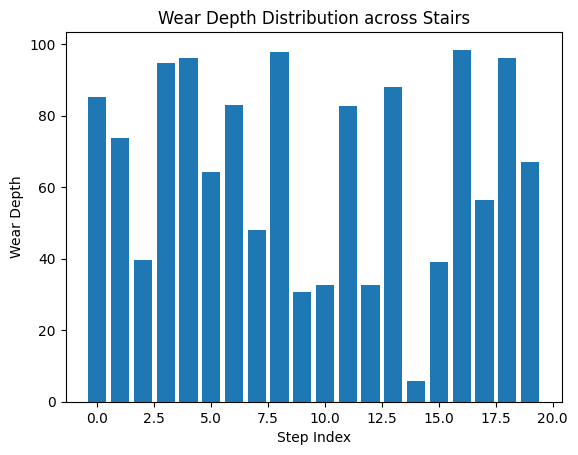

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
N = 1000  # 总人流使用次数
steps = 20  # 台阶数量
P = np.random.rand(steps)  # 假设脚印的概率分布
K = 0.1  # 假设磨损系数

# 模拟磨损过程
wear_depth = np.zeros(steps)
for i in range(steps):
    # 假设每次使用产生的磨损量与概率成正比
    wear_depth[i] = K * N * P[i]

# 可视化结果
plt.bar(range(steps), wear_depth)
plt.xlabel('Step Index')
plt.ylabel('Wear Depth')
plt.title('Wear Depth Distribution across Stairs')
plt.show()


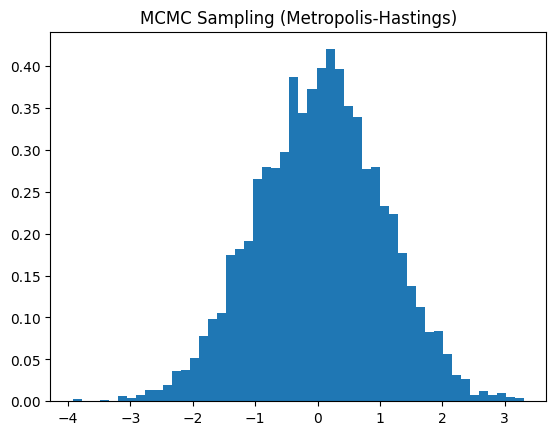

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution (example: Normal distribution)
def target_dist(x):
    return np.exp(-0.5 * x**2)  # Standard normal distribution

# Define the proposal distribution (Gaussian centered around current state)
def proposal_dist(x, scale=1.0):
    return np.random.normal(x, scale)

# Metropolis-Hastings algorithm
def metropolis_hastings(n_samples, initial_state, proposal_dist, target_dist):
    samples = [initial_state]
    x = initial_state
    
    for _ in range(n_samples):
        x_prime = proposal_dist(x)
        acceptance_ratio = min(1, target_dist(x_prime) / target_dist(x))
        
        if np.random.rand() < acceptance_ratio:
            x = x_prime
        
        samples.append(x)
    
    return np.array(samples)

# Parameters
n_samples = 10000
initial_state = 0

# Generate samples
samples = metropolis_hastings(n_samples, initial_state, proposal_dist, target_dist)

# Plot results
plt.hist(samples, bins=50, density=True)
plt.title('MCMC Sampling (Metropolis-Hastings)')
plt.show()


In [19]:
def density1(z):
    z = np.reshape(z, [z.shape[0], 2])
    z1, z2 = z[:, 0], z[:, 1]
    norm = np.sqrt(z1 ** 2 + z2 ** 2)
    exp1 = np.exp(-0.5 * ((z1 - 2) / 0.6) ** 2)
    exp2 = np.exp(-0.5 * ((z1 + 2) / 0.6) ** 2)
    u = 0.5 * ((norm - 2) / 0.4) ** 2 - np.log(exp1 + exp2)
    return np.exp(-u)

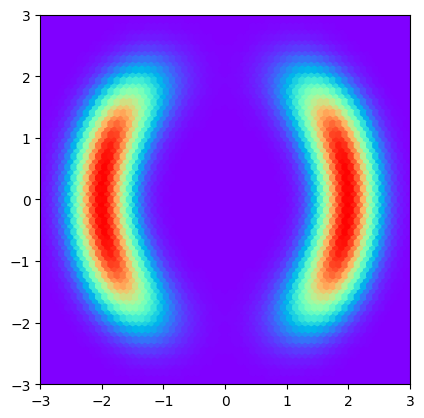

In [22]:
r = np.linspace(-5, 5, 1000)
z = np.array(np.meshgrid(r, r)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

q0 = density1(z)
plt.hexbin(z[:,0], z[:,1], C=q0.squeeze(), cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

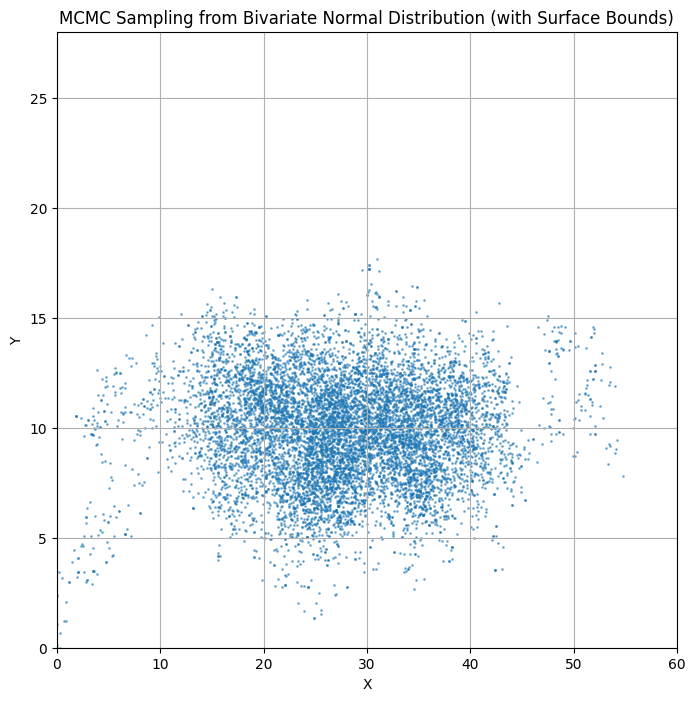

Estimated covariance matrix:
[[70.62691744  0.20780223]
 [ 0.20780223  5.66034919]]


In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bivariate normal target distribution (joint pdf)
def target_dist(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    norm_factor = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))
    exponent = -1 / (2 * (1 - rho**2)) * (
        (x - mu_x)**2 / sigma_x**2 + (y - mu_y)**2 / sigma_y**2 - 
        2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y)
    )
    return norm_factor * np.exp(exponent)

# Define the proposal distribution (bivariate normal centered at current state)
def proposal_dist(x, y, scale=1.0):
    return np.random.multivariate_normal([x, y], scale * np.identity(2))

# Ensure the proposed position stays within the bounds of the surface
def clip_position(x, y, x_max, y_max):
    x = np.clip(x, 0, x_max)
    y = np.clip(y, 0, y_max)
    return x, y

# Metropolis-Hastings MCMC for bivariate distribution
def metropolis_hastings_bivariate(n_samples, initial_state, target_dist, proposal_dist, mu_x, mu_y, sigma_x, sigma_y, rho, x_max, y_max, proposal_scale=1.0):
    samples = [initial_state]
    x, y = initial_state
    
    for _ in range(n_samples):
        # Propose new sample
        x_prime, y_prime = proposal_dist(x, y, proposal_scale)
        
        # Clip the proposed position to stay within the surface bounds
        x_prime, y_prime = clip_position(x_prime, y_prime, x_max, y_max)
        
        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_dist(x_prime, y_prime, mu_x, mu_y, sigma_x, sigma_y, rho) / 
                                   target_dist(x, y, mu_x, mu_y, sigma_x, sigma_y, rho))
        
        # Accept or reject the new sample
        if np.random.rand() < acceptance_ratio:
            x, y = x_prime, y_prime
        
        samples.append([x, y])
    
    return np.array(samples)

# Parameters for the bivariate normal distribution
mu_x = 30  # Center of the surface (x direction)
mu_y = 10  # Center of the surface (y direction)
sigma_x = 9  # Adjust for the spread along x-direction
sigma_y = 2.5  # Adjust for the spread along y-direction (small since people are walking in a single file)
rho = 0  # correlation between X and Y (assuming independent)

# Initialize MCMC parameters
initial_state = [0, 0]  # Start from the origin (0, 0)
n_samples = 10000
proposal_scale = 0.5  # Adjust proposal spread for sampling
x_max = 60  # Length of the surface
y_max = 28  # Width of the surface

# Generate MCMC samples
samples = metropolis_hastings_bivariate(n_samples, initial_state, target_dist, proposal_dist, mu_x, mu_y, sigma_x, sigma_y, rho, x_max, y_max, proposal_scale)

# Plot the samples
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5)
plt.title('MCMC Sampling from Bivariate Normal Distribution (with Surface Bounds)')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.grid(True)


plt.show()

# Optionally: Check the estimated covariance matrix
cov_matrix = np.cov(samples.T)
print("Estimated covariance matrix:")
print(cov_matrix)


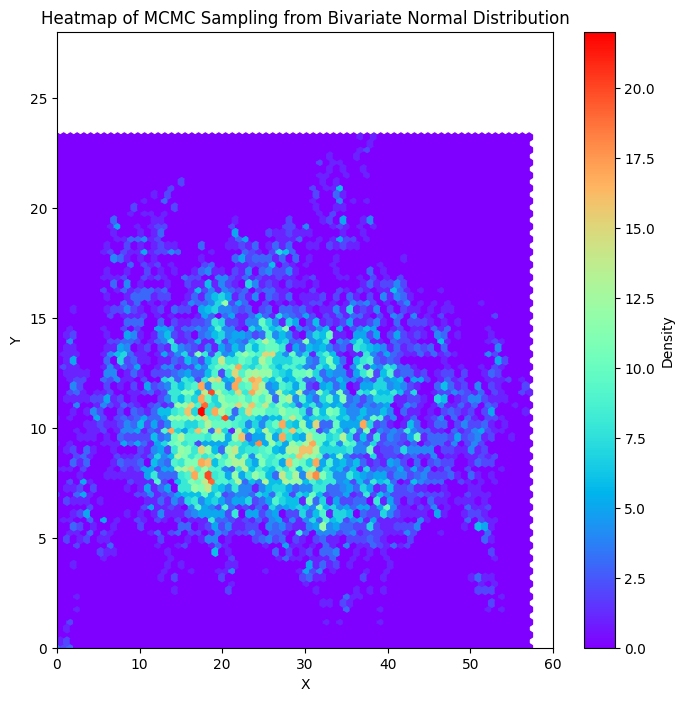

Estimated covariance matrix:
[[113.5496719   -2.13222765]
 [ -2.13222765  10.87656599]]


In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bivariate normal target distribution (joint pdf)
def target_dist(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    norm_factor = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))
    exponent = -1 / (2 * (1 - rho**2)) * (
        (x - mu_x)**2 / sigma_x**2 + (y - mu_y)**2 / sigma_y**2 - 
        2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y)
    )
    return norm_factor * np.exp(exponent)

# Define the proposal distribution (bivariate normal centered at current state)
def proposal_dist(x, y, scale=1.0):
    return np.random.multivariate_normal([x, y], scale * np.identity(2))

# Ensure the proposed position stays within the bounds of the surface
def clip_position(x, y, x_max, y_max):
    x = np.clip(x, 0, x_max)
    y = np.clip(y, 0, y_max)
    return x, y

# Metropolis-Hastings MCMC for bivariate distribution
def metropolis_hastings_bivariate(n_samples, initial_state, target_dist, proposal_dist, mu_x, mu_y, sigma_x, sigma_y, rho, x_max, y_max, proposal_scale=1.0):
    samples = [initial_state]
    x, y = initial_state
    
    for _ in range(n_samples):
        # Propose new sample
        x_prime, y_prime = proposal_dist(x, y, proposal_scale)
        
        # Clip the proposed position to stay within the surface bounds
        x_prime, y_prime = clip_position(x_prime, y_prime, x_max, y_max)
        
        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_dist(x_prime, y_prime, mu_x, mu_y, sigma_x, sigma_y, rho) / 
                                   target_dist(x, y, mu_x, mu_y, sigma_x, sigma_y, rho))
        
        # Accept or reject the new sample
        if np.random.rand() < acceptance_ratio:
            x, y = x_prime, y_prime
        
        samples.append([x, y])
    
    return np.array(samples)

# Parameters for the bivariate normal distribution
mu_x = 30  # Center of the surface (x direction)
mu_y = 10  # Center of the surface (y direction)
sigma_x = 9  # Adjust for the spread along x-direction
sigma_y = 3  # Adjust for the spread along y-direction (small since people are walking in a single file)
rho = 0  # correlation between X and Y (assuming independent)

# Initialize MCMC parameters
initial_state = [0, 0]  # Start from the origin (0, 0)
n_samples = 10000
proposal_scale = 0.5  # Adjust proposal spread for sampling
x_max = 60  # Length of the surface
y_max = 28  # Width of the surface

# Generate MCMC samples
samples = metropolis_hastings_bivariate(n_samples, initial_state, target_dist, proposal_dist, mu_x, mu_y, sigma_x, sigma_y, rho, x_max, y_max, proposal_scale)

# Create the heatmap
plt.figure(figsize=(8, 8))

# Use np.histogram2d to create a 2D histogram (heatmap)
plt.hexbin(samples[:, 0], samples[:, 1], gridsize=70, cmap='rainbow')

# Add title and labels
plt.title('Heatmap of MCMC Sampling from Bivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.colorbar(label='Density')  # Color bar to show density

# Show the plot
plt.show()

# Optionally: Check the estimated covariance matrix
cov_matrix = np.cov(samples.T)
print("Estimated covariance matrix:")
print(cov_matrix)
